# Morphological Transformations

- simple operations based on image shape
- 2 components: the source image & structuring element / kernel
- 2 basic operations: erosion & dilation, then variations: opening, closing, gradient etc.

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from custom_utils import *

import logging

In [2]:
logging.basicConfig(
    #  filename='log_file_name.log',
     level=logging.INFO, 
     format= '[%(asctime)s] %(levelname)s - %(message)s',
     datefmt='%H:%M:%S'
 )

### Input Image

Since morphological transformations normally work on binary images, we will create it.

[14:29:37] INFO - Showing image ... (12.35 x 8.2)
[14:29:37] INFO - Showing image ... (12.35 x 8.2)


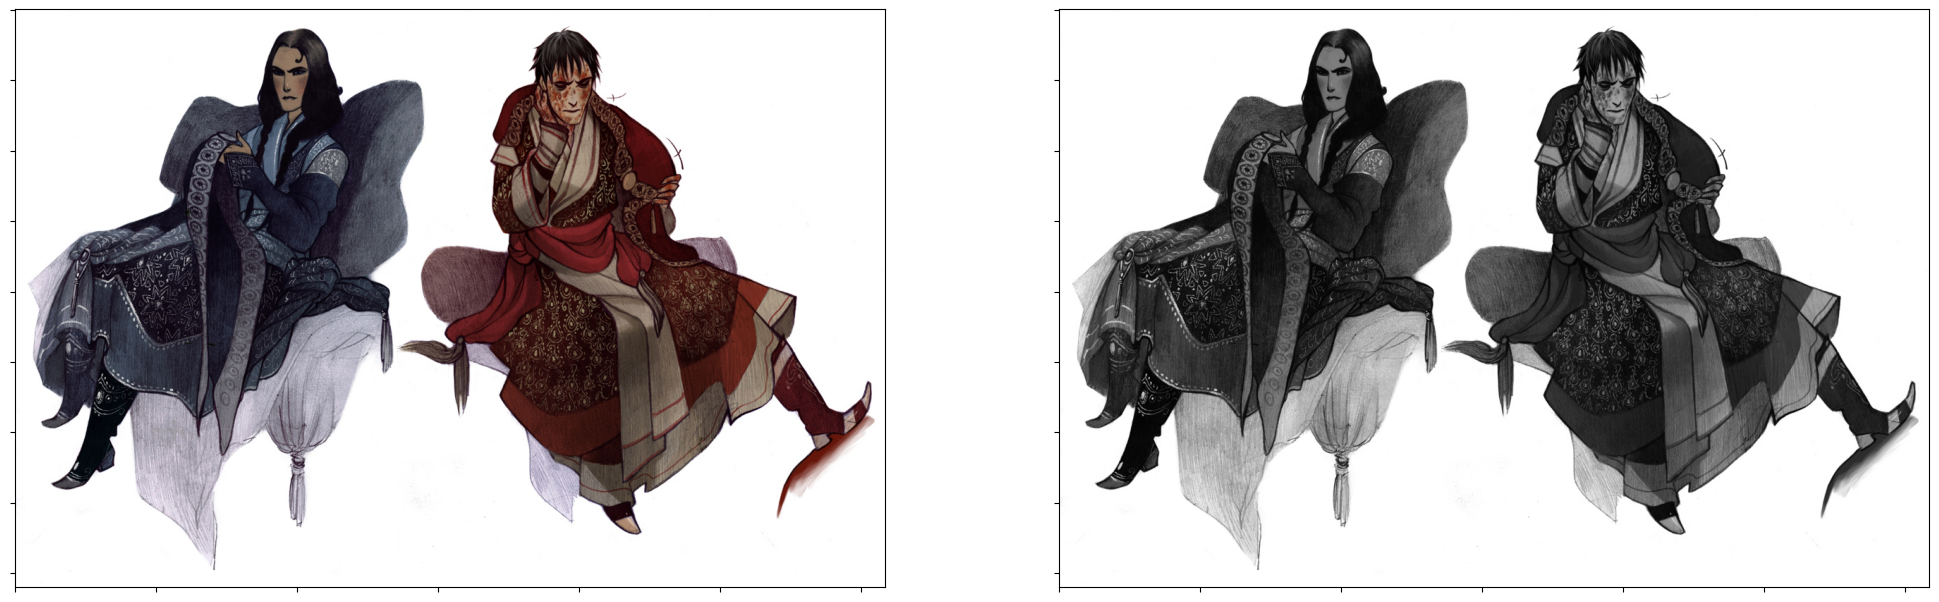

In [3]:
height, width, img, img_rgb, img_gray = load_image_and_show('../data/phobs1.jpeg')

[14:29:39] INFO - Showing image ... (6.18 x 4.1)


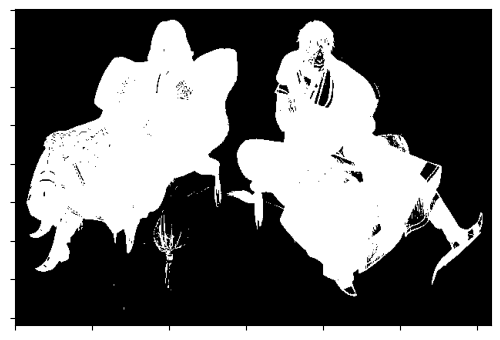

In [4]:
_, img_binary = cv.threshold(
    cv.resize(img_gray, (0, 0), fx=0.5, fy=0.5), 
    127, 255, cv.THRESH_BINARY_INV
)
show_image(img_binary, imshow_args={'cmap': 'gray'})

## Various Morphological Transformations

In [5]:
# kernel = np.ones((5,5), np.uint8)
# kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
# kernel = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))

[14:29:39] INFO - Showing image ... (6.18 x 4.1)
[14:29:39] INFO - Showing image ... (6.18 x 4.1)
[14:29:39] INFO - Showing image ... (6.18 x 4.1)
[14:29:39] INFO - Showing image ... (6.18 x 4.1)


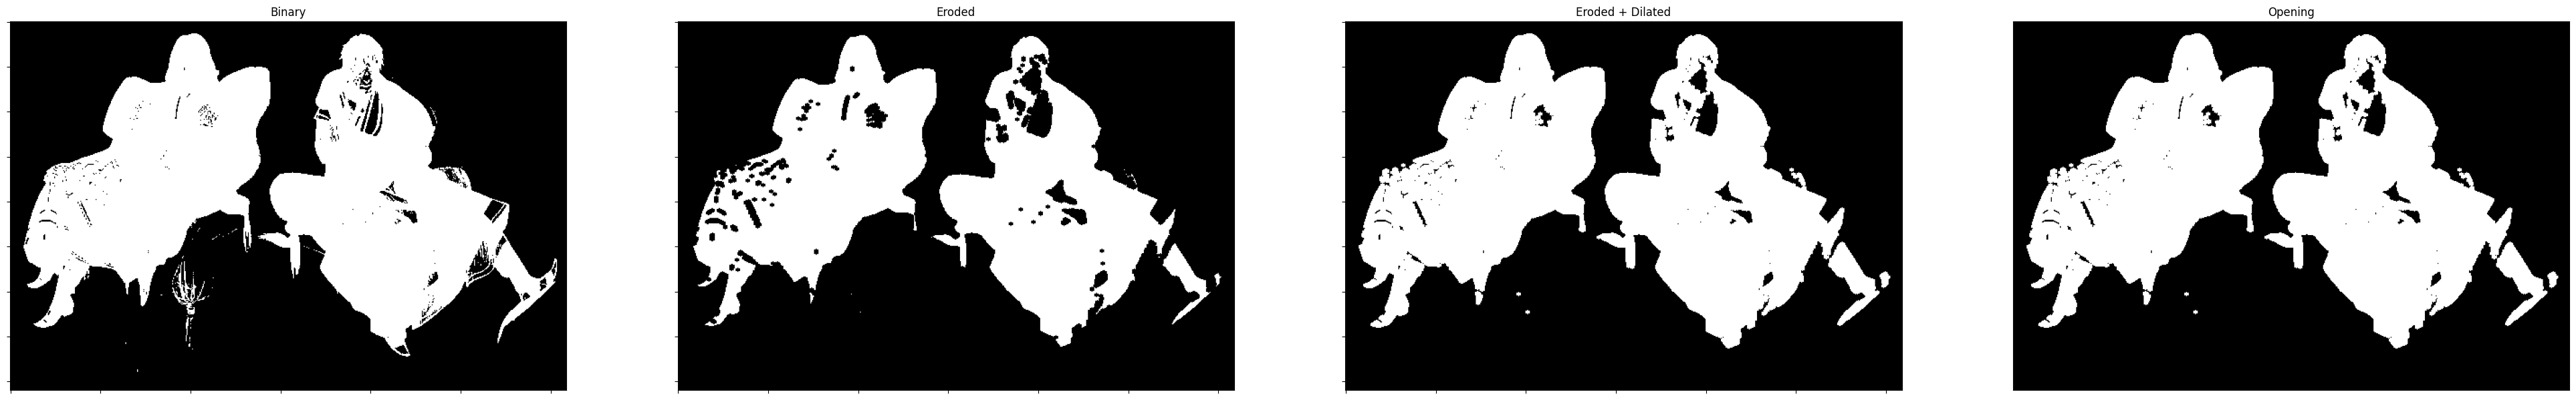

In [6]:
erosion = cv.erode(img_binary, kernel, iterations=1)
dilation = cv.dilate(erosion, kernel, iterations=1)
opening = cv.morphologyEx(img_binary, cv.MORPH_OPEN, kernel)
titles = [
    'Binary', 'Eroded', 'Eroded + Dilated', 'Opening'
]

_, ax = plt.subplots(1, len(titles), figsize=(width*len(titles)/100, height/100))
for i, im in enumerate([img_binary, erosion, dilation, opening]):
    show_image(
        im, ax=ax[i], title=titles[i], imshow_args={'cmap': 'gray'}
    )
    plt.xticks([])
    plt.yticks([])

In [7]:
logging.info("Opening == erosion + dilation")
(dilation == opening).all()

[14:29:41] INFO - Opening == erosion + dilation


True

[14:29:41] INFO - Showing image ... (6.18 x 4.1)
[14:29:41] INFO - Showing image ... (6.18 x 4.1)
[14:29:42] INFO - Showing image ... (6.18 x 4.1)


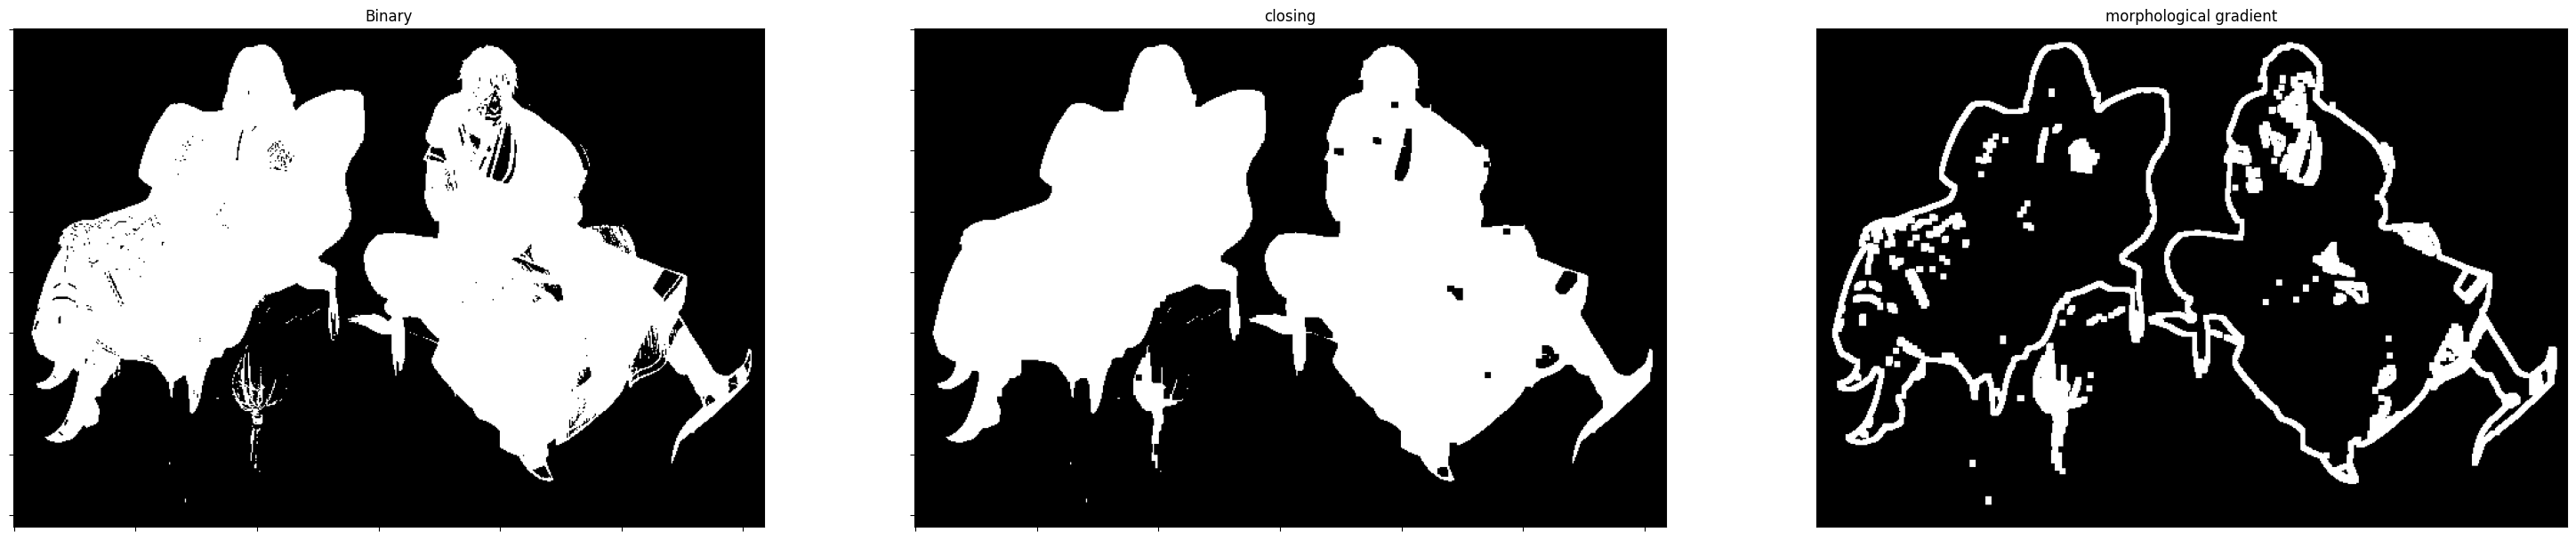

In [8]:
kernel = np.ones((5,5), np.uint8)
closing = cv.morphologyEx(img_binary, cv.MORPH_CLOSE, kernel)
morphological_gradient = cv.morphologyEx(img_binary, cv.MORPH_GRADIENT, kernel)
titles = [
    'Binary', 'closing', 'morphological gradient'
]

_, ax = plt.subplots(1, len(titles), figsize=(width*len(titles)/100, height/100))
for i, im in enumerate([img_binary, closing, morphological_gradient]):
    show_image(
        im, ax=ax[i], title=titles[i], imshow_args={'cmap': 'gray'}
    )
    plt.xticks([])
    plt.yticks([])

In [9]:
logging.info("Morphological gradient == dilation - erosion")
(morphological_gradient == (dilation - erosion)).all()

[14:29:43] INFO - Morphological gradient == dilation - erosion


False

[14:29:43] INFO - Showing image ... (6.18 x 4.1)
[14:29:43] INFO - Showing image ... (6.18 x 4.1)
[14:29:43] INFO - Showing image ... (6.18 x 4.1)


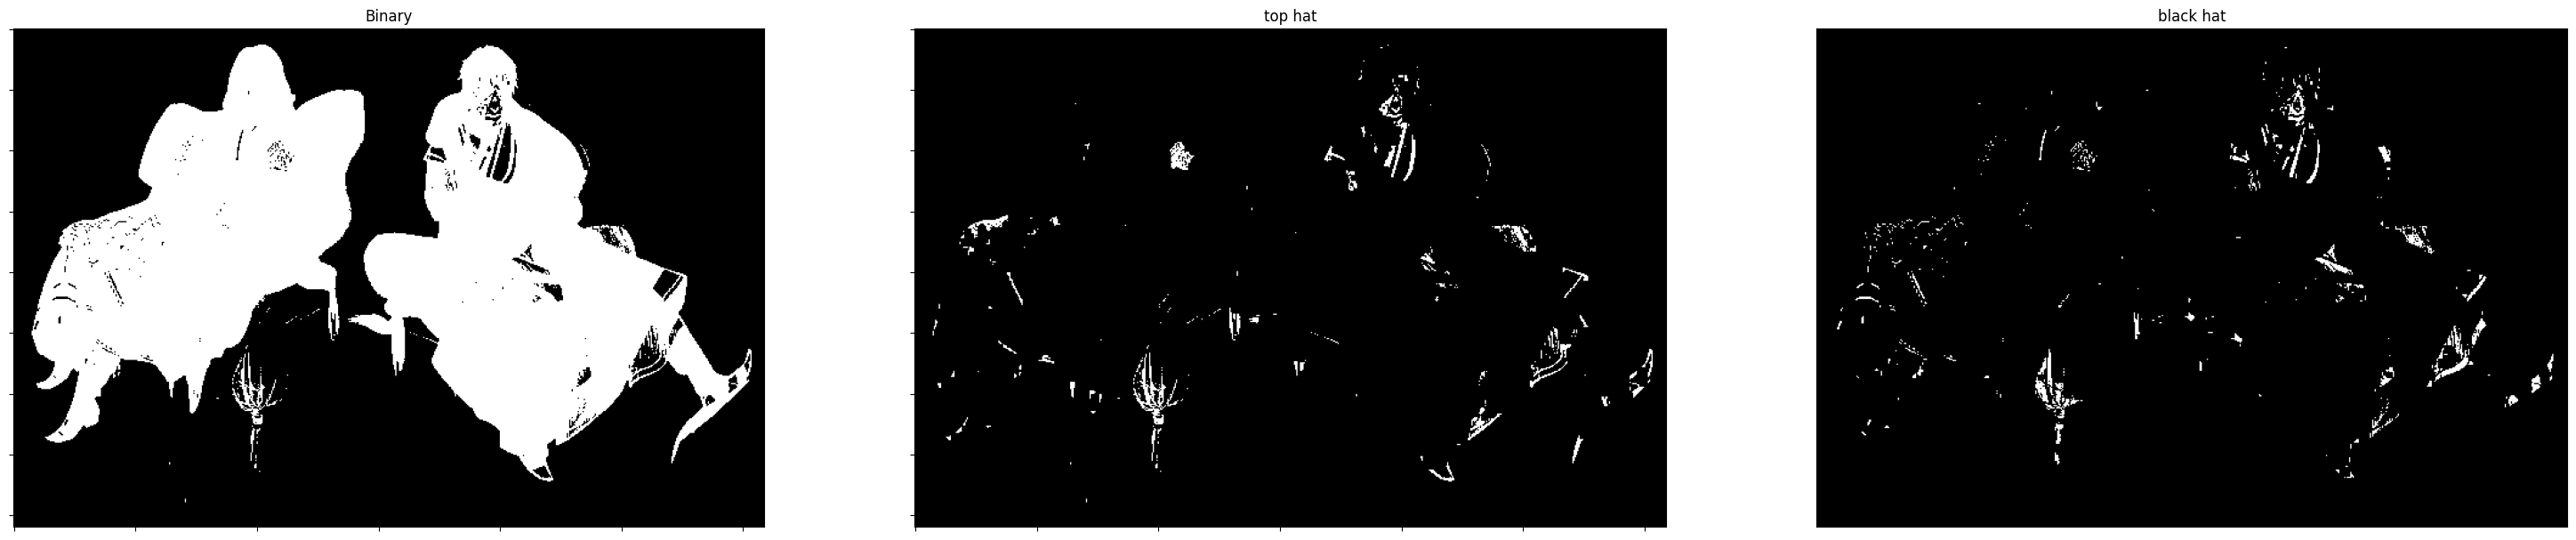

In [10]:
kernel = np.ones((5,5), np.uint8)
# Input image - opening
# top_hat = opening - img_binary
top_hat = cv.morphologyEx(img_binary, cv.MORPH_TOPHAT, kernel)
# Closing - input image
# black_hat = closing - img_binary
black_hat = cv.morphologyEx(img_binary, cv.MORPH_BLACKHAT, kernel)
titles = [
    'Binary', 'top hat', 'black hat'
]

_, ax = plt.subplots(1, len(titles), figsize=(width*len(titles)/100, height/100))
for i, im in enumerate([img_binary, top_hat, black_hat]):
    show_image(
        im, ax=ax[i], title=titles[i], imshow_args={'cmap': 'gray'}
    )
    plt.xticks([])
    plt.yticks([])